In [1]:
# importando librerias
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px  # para graficos interactivos
import plotly.graph_objects as go  # para graficos interactivos

In [2]:
tickers = ["IEF", "LQD", "HYG", "SPY", "GLD", "VNQ", "JNJ","XLP", "XLU", "XLF", "VZ", "AAPL","MSFT"] # lista de tickers, algunos ETFs y acciones

In [5]:
datos = yf.download(tickers, period="10y", auto_adjust=False)["Adj Close"] 
datos

[*********************100%***********************]  13 of 13 completed


Ticker,AAPL,GLD,HYG,IEF,JNJ,LQD,MSFT,SPY,VNQ,VZ,XLF,XLP,XLU
Date,,,,,,,,,,,,,
2015-09-14,25.913105,106.220001,50.905704,86.178650,70.673836,82.050056,37.504005,165.231277,49.511806,27.203613,15.488910,35.985489,30.116199
2015-09-15,26.131088,105.900002,50.893913,85.500053,71.491753,81.432587,38.323124,167.296616,49.999947,27.632662,15.710463,36.414711,30.275276
2015-09-16,26.160305,107.309998,50.711143,85.475784,71.650787,81.581635,38.601967,168.746521,50.534931,27.525408,15.811177,36.828609,30.578968
2015-09-17,25.600725,108.410004,50.752411,86.186668,71.824989,82.255821,38.558388,168.367203,51.110046,26.953331,15.589617,36.828609,30.998348
2015-09-18,25.495121,109.209999,50.610935,86.590614,70.726860,82.504250,37.887428,165.615860,51.023121,26.560022,15.288042,36.402794,30.823908
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-09-05,239.690002,331.049988,80.870003,96.779999,178.429993,111.169998,495.000000,647.239990,92.470001,44.380001,53.070000,80.870003,83.470001
2025-09-08,237.880005,334.820007,80.870003,97.080002,178.130005,111.559998,498.200012,648.830017,91.930000,43.320000,53.110001,80.570000,82.620003
2025-09-09,234.350006,334.059998,80.779999,96.849998,176.960007,111.360001,498.410004,650.330017,91.720001,43.570000,53.340000,80.730003,83.190002


In [6]:
datos.info() # para ver la informacion del dataframe

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2514 entries, 2015-09-14 to 2025-09-11
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2514 non-null   float64
 1   GLD     2514 non-null   float64
 2   HYG     2514 non-null   float64
 3   IEF     2514 non-null   float64
 4   JNJ     2514 non-null   float64
 5   LQD     2514 non-null   float64
 6   MSFT    2514 non-null   float64
 7   SPY     2514 non-null   float64
 8   VNQ     2514 non-null   float64
 9   VZ      2514 non-null   float64
 10  XLF     2514 non-null   float64
 11  XLP     2514 non-null   float64
 12  XLU     2514 non-null   float64
dtypes: float64(13)
memory usage: 275.0 KB


In [7]:
datos_anuales = datos.resample("Y").last() # convierte los datos a anuales tomando el ultimo valor de cada año
datos_anuales

C:\Users\Usuario\AppData\Local\Temp\ipykernel_7780\2009035858.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  datos_anuales = datos.resample("Y").last() # convierte los datos a anuales tomando el ultimo valor de cada año


Ticker,AAPL,GLD,HYG,IEF,JNJ,LQD,MSFT,SPY,VNQ,VZ,XLF,XLP,XLU
Date,,,,,,,,,,,,,
2015-12-31,23.755867,101.459999,48.438263,85.824028,78.366203,81.841148,48.669792,173.778671,54.601917,27.901066,16.178139,39.235340,31.916882
2016-12-31,26.720694,109.610001,54.935928,86.683655,90.379105,86.919106,56.008099,194.628448,59.283310,33.676456,19.804504,41.189526,37.047977
2017-12-31,39.670715,123.650002,58.272652,88.896576,112.454407,93.051247,78.820549,236.873322,62.187553,35.015255,24.161469,46.536739,41.511547
2018-12-31,37.532379,121.250000,57.093136,89.774605,106.683830,89.527214,95.211533,226.050644,58.439556,38.957172,21.007893,42.780693,43.145092
2019-12-31,70.920357,142.899994,65.136795,96.983170,123.987999,105.076515,150.013474,296.632355,75.334892,44.347454,27.703947,54.517136,54.333176
2020-12-31,129.292572,178.360001,68.046776,106.687965,137.408081,116.603439,213.820297,351.009796,71.861603,44.289391,27.222908,60.029243,54.610573
2021-12-31,174.090134,170.960007,70.602692,103.137558,153.124893,114.456055,326.026581,451.850769,100.992157,40.946049,36.695889,70.357544,64.278839
2022-12-31,128.123047,169.639999,62.848522,87.506897,162.273956,93.943611,234.658401,369.725220,74.480553,32.747982,32.811100,69.788086,65.206337
2023-12-31,190.913651,191.169998,70.102203,90.696007,148.353470,102.778549,371.209137,466.503693,83.307861,33.636505,36.758583,69.217072,60.527935


In [ ]:
retornos_anuales = datos_anuales.pct_change().dropna() # calcula los retornos anuales y elimina la primera fila con NA
retornos_anuales

Ticker,AAPL,GLD,HYG,IEF,JNJ,LQD,MSFT,SPY,VNQ,VZ,XLF,XLP,XLU
Date,,,,,,,,,,,,,
2015-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-31,0.124804,0.080327,0.134143,0.010016,0.153292,0.062047,0.150777,0.119979,0.085737,0.206995,0.224152,0.049807,0.160764
2017-12-31,0.484644,0.128091,0.060738,0.025529,0.244252,0.070550,0.407306,0.217054,0.048989,0.039755,0.219999,0.129820,0.120481
2018-12-31,-0.053902,-0.019410,-0.020241,0.009877,-0.051315,-0.037872,0.207953,-0.045690,-0.060269,0.112577,-0.130521,-0.080711,0.039352
2019-12-31,0.889578,0.178557,0.140887,0.080296,0.162200,0.173682,0.575581,0.312238,0.289108,0.138364,0.318740,0.274340,0.259313
2020-12-31,0.823067,0.248146,0.044675,0.100067,0.108237,0.109700,0.425341,0.183316,-0.046105,-0.001309,-0.017364,0.101108,0.005105
2021-12-31,0.346482,-0.041489,0.037561,-0.033278,0.114381,-0.018416,0.524769,0.287288,0.405370,-0.075489,0.347978,0.172054,0.177040
2022-12-31,-0.264042,-0.007721,-0.109828,-0.151552,0.059749,-0.179217,-0.280248,-0.181754,-0.262512,-0.200216,-0.105864,-0.008094,0.014429
2023-12-31,0.490080,0.126916,0.115415,0.036444,-0.085784,0.094045,0.581913,0.261758,0.118518,0.027132,0.120309,-0.008182,-0.071748


In [ ]:
datos_analiticos = retornos_anuales.describe() # calcula estadisticos descriptivos de los retornos anuales, algunas metricas
datos_analiticos

Ticker,AAPL,GLD,HYG,IEF,JNJ,LQD,MSFT,SPY,VNQ,VZ,XLF,XLP,XLU
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.306960,0.134255,0.055374,0.015027,0.092092,0.036558,0.291783,0.153184,0.069479,0.053907,0.140884,0.078985,0.107762
std,0.381553,0.138144,0.075585,0.072089,0.122493,0.098474,0.266678,0.157284,0.184095,0.123166,0.174824,0.102736,0.107306
min,-0.264042,-0.041489,-0.109828,-0.151552,-0.085784,-0.179217,-0.280248,-0.181754,-0.262512,-0.200216,-0.130521,-0.080711,-0.071748
25%,-0.009226,0.014291,0.039340,-0.002288,-0.021149,-0.011666,0.161875,0.122180,-0.022549,0.005801,0.017055,0.003352,0.020660
50%,0.326767,0.127503,0.065735,0.017772,0.111309,0.066298,0.307630,0.200185,0.058415,0.076166,0.172922,0.075457,0.130122
75%,0.488721,0.230748,0.106477,0.068525,0.159973,0.091152,0.499912,0.258535,0.110323,0.136630,0.285210,0.127870,0.172971
max,0.889578,0.382563,0.140887,0.100067,0.264025,0.173682,0.581913,0.312238,0.405370,0.206995,0.347978,0.274340,0.259313


In [ ]:
df_graph = datos_analiticos.loc[["mean", "std"],:].T # el grafico mas lindo solo con la media y desviacion estandar y la transpuesta
df_graph

,mean,std
Ticker,,
AAPL,0.306960,0.381553
GLD,0.134255,0.138144
HYG,0.055374,0.075585
IEF,0.015027,0.072089
JNJ,0.092092,0.122493
LQD,0.036558,0.098474
MSFT,0.291783,0.266678
SPY,0.153184,0.157284
VNQ,0.069479,0.184095


In [16]:
# Mostrando el grafico de Rentabilidad Total vs Riesgo
fig = px.scatter(df_graph,x="std",y="mean", symbol=df_graph.index,color=df_graph.index,text=df_graph.index)
# fig = guarda el gráfico que devuelve Plotly Express en la variable fig. # px.scatter( llama a Plotly Express para crear un gráfico de dispersión
# f_graph, es el DataFrame que contiene los datos. Plotly buscará en sus columnas lo que le pidas en x= y y=
fig.update_traces(textposition='top center') 
# fig.update_traces( aplica cambios a todas las trazas del gráfico (en un scatter de px normalmente hay una traza por grupo). # extposition='top center' coloca las etiquetas de texto arriba y centradas respecto al punto.
fig.update_layout(title="Rendimiento vs Riesgo",xaxis_title="Riesgo",yaxis_title="Rentabilidad")  
# fig.update_layout( ajusta la presentación (layout) del gráfico.
fig.show()

In [ ]:
Y = datos.resample("ME").last().pct_change().dropna()  # retornos mensuales  
Y

Ticker,AAPL,GLD,HYG,IEF,JNJ,LQD,MSFT,SPY,VNQ,VZ,XLF,XLP,XLU
Date,,,,,,,,,,,,,
2015-10-31,0.083409,0.022834,0.032308,-0.006369,0.082271,0.005736,0.189336,0.085060,0.057585,0.091449,0.062665,0.057004,0.010626
2015-11-30,-0.005804,-0.067521,-0.024961,-0.004276,0.009465,-0.001542,0.039444,0.003655,-0.006258,-0.030503,0.019934,-0.009222,-0.021257
2015-12-31,-0.110228,-0.004513,-0.019923,-0.004531,0.014619,-0.010810,0.020791,-0.017282,0.018310,0.016942,-0.023644,0.029177,0.021192
2016-01-31,-0.075242,0.054110,-0.016009,0.033337,0.016744,0.001228,-0.007029,-0.049786,-0.034366,0.094431,-0.088544,0.005348,0.049446
2016-02-29,-0.001288,0.109303,0.014969,0.014860,0.014673,0.010517,-0.069789,-0.000826,-0.003637,0.015209,-0.029005,0.003152,0.019375
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-31,-0.053584,-0.000560,0.017532,-0.012396,0.001475,0.002064,0.166840,0.062845,0.011208,-0.002270,0.045119,0.012220,0.038276
2025-06-30,0.021509,0.004051,0.018385,0.016019,-0.015850,0.020824,0.080481,0.051386,0.006885,-0.015696,0.031191,-0.015750,0.003747
2025-07-31,0.011698,-0.006135,0.001358,-0.005939,0.078494,-0.000897,0.072556,0.023032,0.000898,0.004192,0.000000,-0.014697,0.049106


In [19]:
# INSTALAMOS LA LIBRERIA RISK FOLIO
%pip install riskfolio-lib  # instalar la libreria riskfolio-lib para optimizacion de portafolios

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#': Expected package name at the start of dependency specifier
    #
    ^


In [20]:
import riskfolio as rp  # importando la libreria riskfolio

In [ ]:
port = rp.Portfolio(returns=Y)  #le pasas la matriz de retornos (índice de fechas, columnas = activos).
# A partir de esto, el objeto port puede estimar medias/varianzas, covarianzas (histórica, shrinkage, robusta), y resolver optimizaciones (MV, MAD, CVaR, etc.) 
# con métodos como assets_stats(...), optimization(...), efficient_frontier(...), etc.


In [23]:
method_mu = "hist" 
# method_mu → nombre del método para estimar la media (μ) de los retornos que usará riskfolio-lib
# "hist" → histórico: usa la media muestral aritmética calculada directamente de tus retornos
method_cov = "hist"

In [24]:
port.assets_stats(method_mu=method_mu,method_cov=method_cov) # calcula las estadísticas de los activos (medias, covarianzas, etc.) usando los métodos especificados

#### Optimizacion de Portafolio M/V con funcion objetivo maximizar el Ratio de Sharpe

In [25]:
port.alpha = 0.05  # nivel de confianza para medidas de riesgo como CVaR, EVaR, etc. (usado en optimizaciones que las requieren) significa cola del 5% (equivale a 95% de confianza)
model = "Classic"  # modelo de optimización: "Classic" para media-varianza (MV), "BL" para Black-Litterman, "FM" para Fama-French.   media-varianza clásico: usa las estimaciones de μ (medias) y Σ (covarianzas) que calculaste (p. ej., con method_mu="hist", method_cov="hist").
rm = "MV" # rm (risk measure) → medida de riesgo a usar en la optimización. "MV" → Mean–Variance: el riesgo del portafolio se mide por la varianza (y su raíz, la desviación estándar).
obj = "Sharpe" # obj → objetivo de la optimización. "Sharpe" → maximizar el ratio de Sharpe (rentabilidad/riesgo)
hist = True  # hist → si True, usa los retornos históricos para la optimización (si False, usa simulados). hist → indica que se usen estimaciones históricas/empíricas
rf = 0 # tasa libre de riesgo (usada en el cálculo del ratio de Sharpe). Si no tienes una tasa libre de riesgo específica, puedes usar 0
l = 0 # l (lambda) → parámetro de aversión al riesgo (usado en algunas optimizaciones). Si no se usa, puede ser 0

In [26]:
w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist) # optimiza el portafolio con los parámetros especificados y devuelve los pesos óptimos

In [ ]:
w # muestra los pesos óptimos del portafolio según la optimización realizada

,weights
AAPL,3.702229e-02
GLD,4.656549e-01
HYG,9.157443e-10
IEF,7.475479e-10
JNJ,1.779797e-03
LQD,4.158445e-10
MSFT,3.947939e-01
SPY,6.102204e-10
VNQ,2.255019e-10
VZ,5.304976e-10


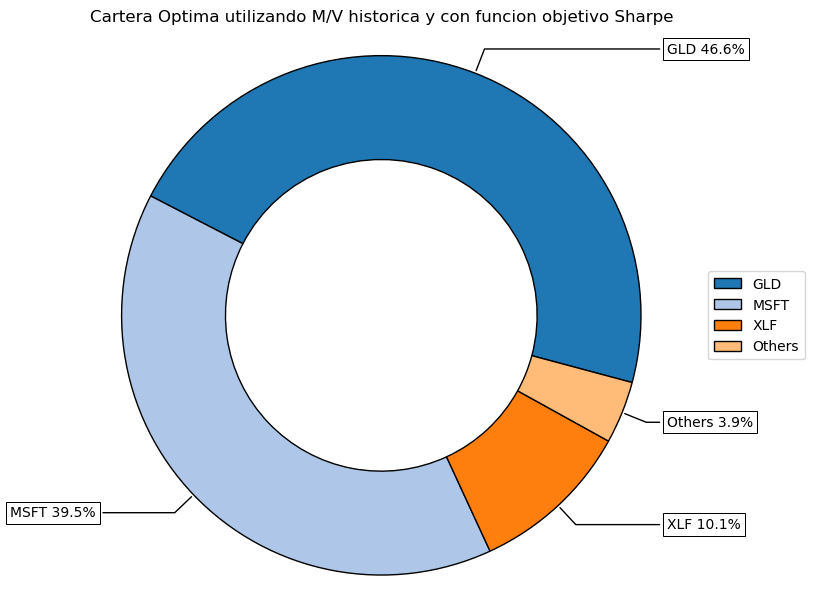

In [ ]:
ax = rp.plot_pie(w=w,title="Cartera Optima utilizando M/V historica y con funcion objetivo Sharpe",nrow=25,height=6) # grafico de pastel con los pesos del portafolio optimizado

In [ ]:
points = 50 # points → número entero que indica cuántos portafolios quieres calcular a lo largo de la frontera eficiente.
frontier = port.efficient_frontier(model=model,rm=rm,points=points,hist=hist,rf=rf) 
display(frontier.T.head(10))

,AAPL,GLD,HYG,IEF,JNJ,LQD,MSFT,SPY,VNQ,VZ,XLF,XLP,XLU
0,5.434681e-10,4.461090e-09,0.374696,0.595559,0.029745,1.465163e-09,1.542004e-09,1.130219e-09,5.032753e-10,1.783143e-09,4.674007e-09,8.114426e-09,1.561381e-09
1,1.388049e-09,7.140691e-02,0.340260,0.482251,0.042338,2.496127e-09,5.224663e-02,2.622470e-09,8.775272e-10,3.240874e-09,1.149744e-02,1.024303e-08,4.103739e-09
2,2.925876e-08,1.130644e-01,0.298834,0.437079,0.042320,2.596201e-08,8.409915e-02,2.822490e-08,9.761281e-09,3.924286e-08,2.460294e-02,1.739732e-07,6.394169e-08
3,1.692931e-08,1.468759e-01,0.265051,0.400517,0.042327,1.453045e-08,1.099778e-01,1.535456e-08,5.116764e-09,1.540688e-08,3.525149e-02,4.314026e-08,2.678138e-08
4,7.531217e-08,1.766366e-01,0.235501,0.368201,0.042334,5.276089e-08,1.327235e-01,5.732760e-08,1.893902e-08,6.528852e-08,4.460302e-02,1.759495e-07,1.134103e-07
5,3.246839e-09,2.038510e-01,0.208350,0.338745,0.042347,1.929501e-09,1.535228e-01,1.878041e-09,6.935234e-10,2.898855e-09,5.318463e-02,1.051311e-08,3.392279e-09
6,1.457231e-07,2.292911e-01,0.183106,0.311120,0.042329,5.246082e-08,1.729907e-01,5.705610e-08,1.791061e-08,6.381106e-08,6.116274e-02,1.818016e-07,1.545429e-07
7,5.105282e-07,2.534379e-01,0.159008,0.284991,0.042328,4.866809e-08,1.914570e-01,5.489993e-08,1.779952e-08,5.878802e-08,6.877727e-02,2.035699e-07,2.031728e-07
8,1.161235e-07,2.765832e-01,0.135981,0.259887,0.042330,3.647144e-08,2.091612e-01,3.797367e-08,1.275088e-08,3.918467e-08,7.605700e-02,1.041185e-07,1.340508e-07
9,1.329759e-06,2.989428e-01,0.113719,0.235655,0.042334,3.355487e-08,2.262607e-01,3.459246e-08,1.143344e-08,3.668492e-08,8.308630e-02,8.833410e-08,1.130732e-07


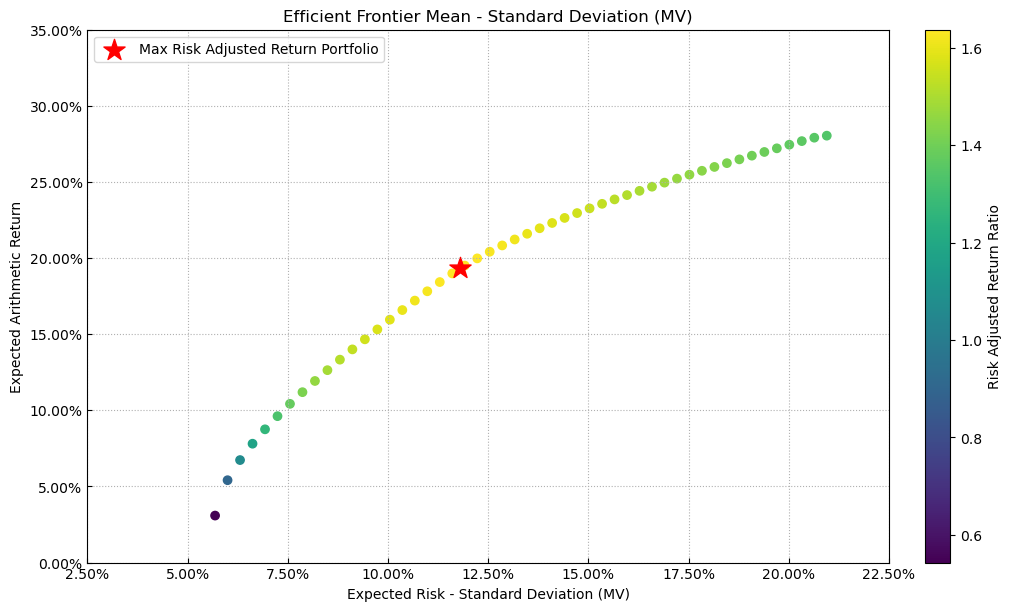

In [37]:
ax = rp.plot_frontier(w_frontier=frontier,mu=port.mu,cov=port.cov,returns=port.returns,w=w,label="Max Risk Adjusted Return Portfolio",t_factor=12)
# rp.plot_frontier( … ) Llama a la función de riskfolio-lib que dibuja la frontera eficiente (riesgo vs. retorno) y, opcionalmente, resalta un portafolio específico. Devuelve un objeto Matplotlib Axes, que guardas en ax


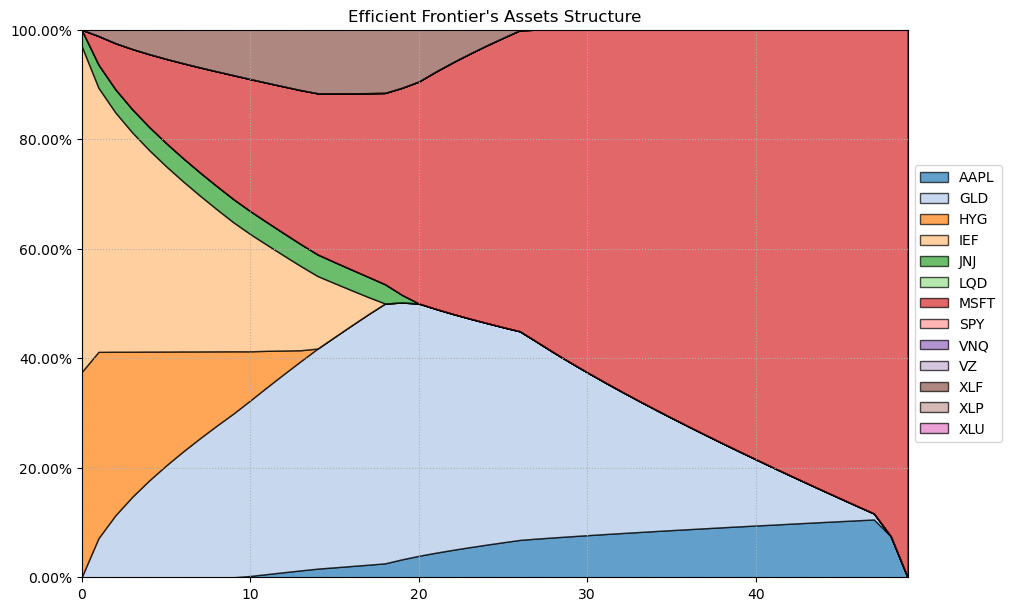

In [ ]:
# Graficamos la evolucion de la frontera eficiente
ax = rp.plot_frontier_area(w_frontier=frontier,cmap="tab20",height=6,width=10,ax=None)  #aca vemos el transito del portafolio que hace que alcanze el maximo ratio de sharpe
# rp.plot_frontier_area( … ) Función de riskfolio-lib que dibuja un stacked area chart (área apilada) de los pesos por activo a lo largo de la frontera eficiente. Muestra cómo cambia la composición del portafolio desde el extremo de mínimo riesgo hasta el de máximo retorno.
# cmap="tab20" Paleta de colores   # ax=None Indica que la función cree un Axes nuevo. Si pasaras un ax existente (por ejemplo, de un subplot), dibuja encima de ese Axes.

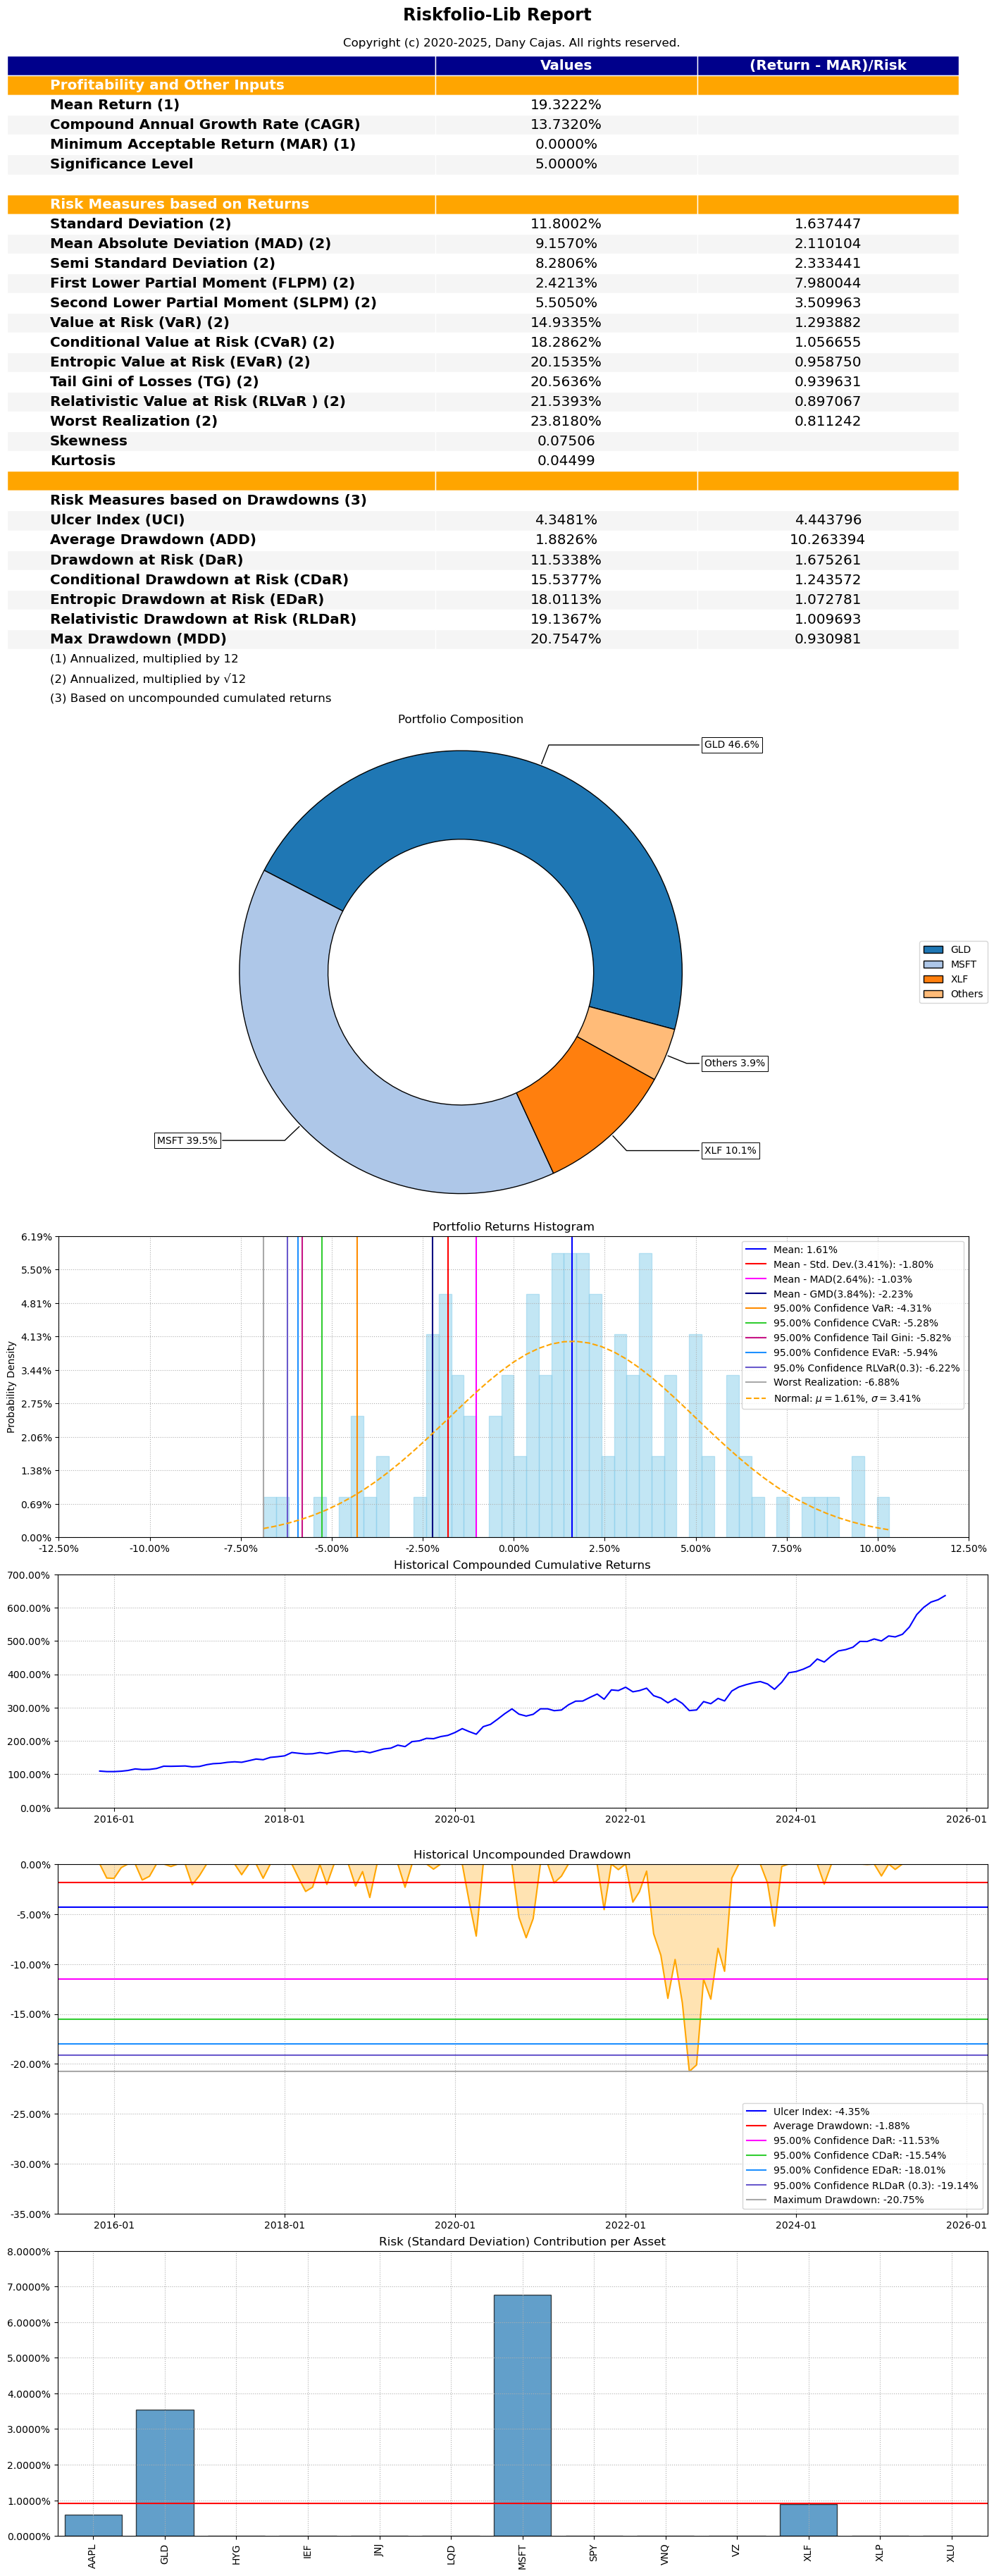

In [ ]:
ax = rp.jupyter_report(Y,w,rm=rm,t_factor=12)
# rp.jupyter_report( … ) Función de riskfolio-lib que genera un informe visual compacto para Jupyter con gráficos y tablas del portafolio especificado por w usando los retornos Y
#  _factor=12 Factor de anualización: al ser retornos mensuales, medias → se multiplican por 12, desviaciones estándar → por √12, y se ajustan ratios (Sharpe, Sortino, etc.) a base anual.
plt.show()

#### Optmizacion de Portafolio con funcion objetivo Minimizacion de Riesgo

In [41]:
port.alpha=0.05
model='Classic' # Modelo calculado con datos historicos (Clasico)
rm='MV' # Utilizando la matriz de varianzas y covarianzas historicas
obj='MinRisk' # Funcion objetivo, tambien podria utilizar 'MinRisk','MaxRet' o 'Sharpe'
hist=True # Basado en datos historicos
rf=0 # Tasa libre de riesgo
l=0 # lambda es el facto de aversion al riesgo, sirve para la modelizacion de la funcion de utilida

In [42]:
w_min=port.optimization(model=model,rm=rm,obj=obj,hist=hist,rf=rf,l=l) # Optimizar el portafolio
display(w_min)

,weights
AAPL,5.434681e-10
GLD,4.461090e-09
HYG,3.746960e-01
IEF,5.955593e-01
JNJ,2.974475e-02
LQD,1.465163e-09
MSFT,1.542004e-09
SPY,1.130219e-09
VNQ,5.032753e-10
VZ,1.783143e-09


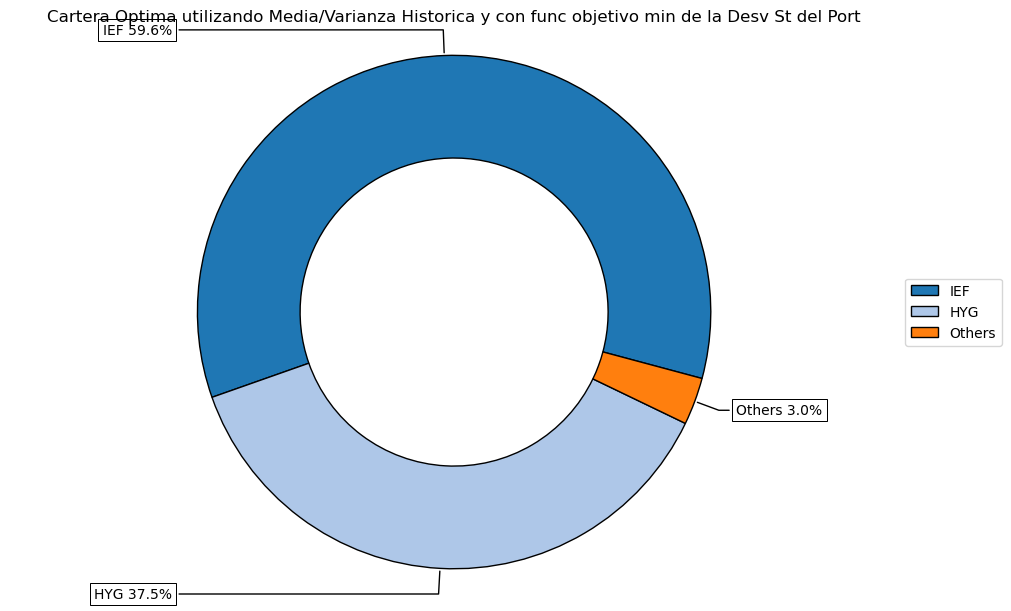

In [43]:
ax=rp.plot_pie(w=w_min,title='Cartera Optima utilizando Media/Varianza Historica y con func objetivo min de la Desv St del Port',nrow=25,height=6,width=10)

In [44]:
points=50
frontier=port.efficient_frontier(model=model,rm=rm,points=points,hist=hist,rf=rf)
display(frontier.T.head(10))

,AAPL,GLD,HYG,IEF,JNJ,LQD,MSFT,SPY,VNQ,VZ,XLF,XLP,XLU
0,5.434681e-10,4.461090e-09,0.374696,0.595559,0.029745,1.465163e-09,1.542004e-09,1.130219e-09,5.032753e-10,1.783143e-09,4.674007e-09,8.114426e-09,1.561381e-09
1,1.388049e-09,7.140691e-02,0.340260,0.482251,0.042338,2.496127e-09,5.224663e-02,2.622470e-09,8.775272e-10,3.240874e-09,1.149744e-02,1.024303e-08,4.103739e-09
2,2.925876e-08,1.130644e-01,0.298834,0.437079,0.042320,2.596201e-08,8.409915e-02,2.822490e-08,9.761281e-09,3.924286e-08,2.460294e-02,1.739732e-07,6.394169e-08
3,1.692931e-08,1.468759e-01,0.265051,0.400517,0.042327,1.453045e-08,1.099778e-01,1.535456e-08,5.116764e-09,1.540688e-08,3.525149e-02,4.314026e-08,2.678138e-08
4,7.531217e-08,1.766366e-01,0.235501,0.368201,0.042334,5.276089e-08,1.327235e-01,5.732760e-08,1.893902e-08,6.528852e-08,4.460302e-02,1.759495e-07,1.134103e-07
5,3.246839e-09,2.038510e-01,0.208350,0.338745,0.042347,1.929501e-09,1.535228e-01,1.878041e-09,6.935234e-10,2.898855e-09,5.318463e-02,1.051311e-08,3.392279e-09
6,1.457231e-07,2.292911e-01,0.183106,0.311120,0.042329,5.246082e-08,1.729907e-01,5.705610e-08,1.791061e-08,6.381106e-08,6.116274e-02,1.818016e-07,1.545429e-07
7,5.105282e-07,2.534379e-01,0.159008,0.284991,0.042328,4.866809e-08,1.914570e-01,5.489993e-08,1.779952e-08,5.878802e-08,6.877727e-02,2.035699e-07,2.031728e-07
8,1.161235e-07,2.765832e-01,0.135981,0.259887,0.042330,3.647144e-08,2.091612e-01,3.797367e-08,1.275088e-08,3.918467e-08,7.605700e-02,1.041185e-07,1.340508e-07
9,1.329759e-06,2.989428e-01,0.113719,0.235655,0.042334,3.355487e-08,2.262607e-01,3.459246e-08,1.143344e-08,3.668492e-08,8.308630e-02,8.833410e-08,1.130732e-07


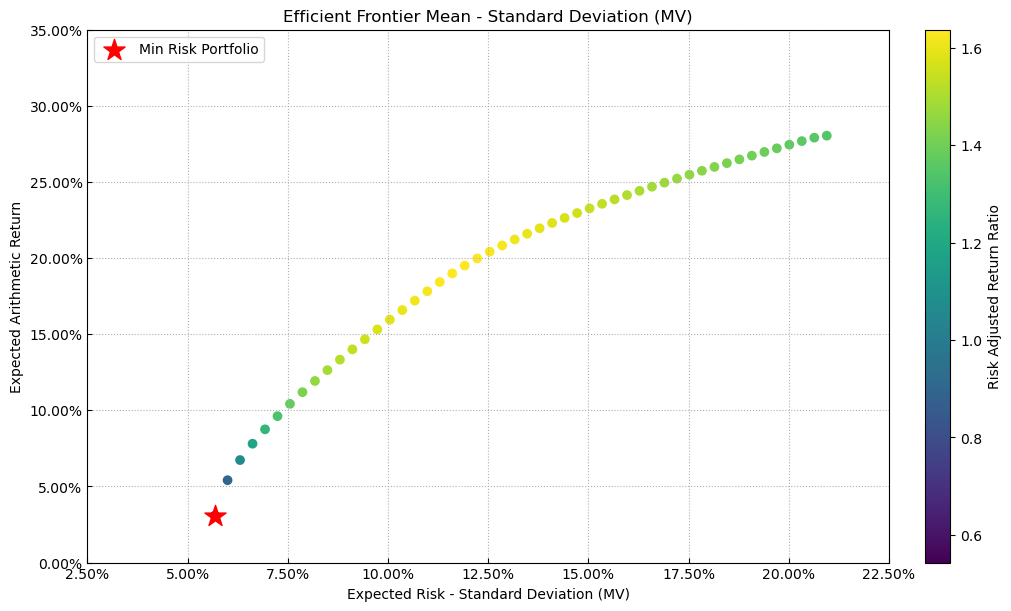

In [45]:
ax=rp.plot_frontier(w_frontier=frontier,mu=port.mu,cov=port.cov,returns=port.returns,w=w_min,label='Min Risk Portfolio',t_factor=12)

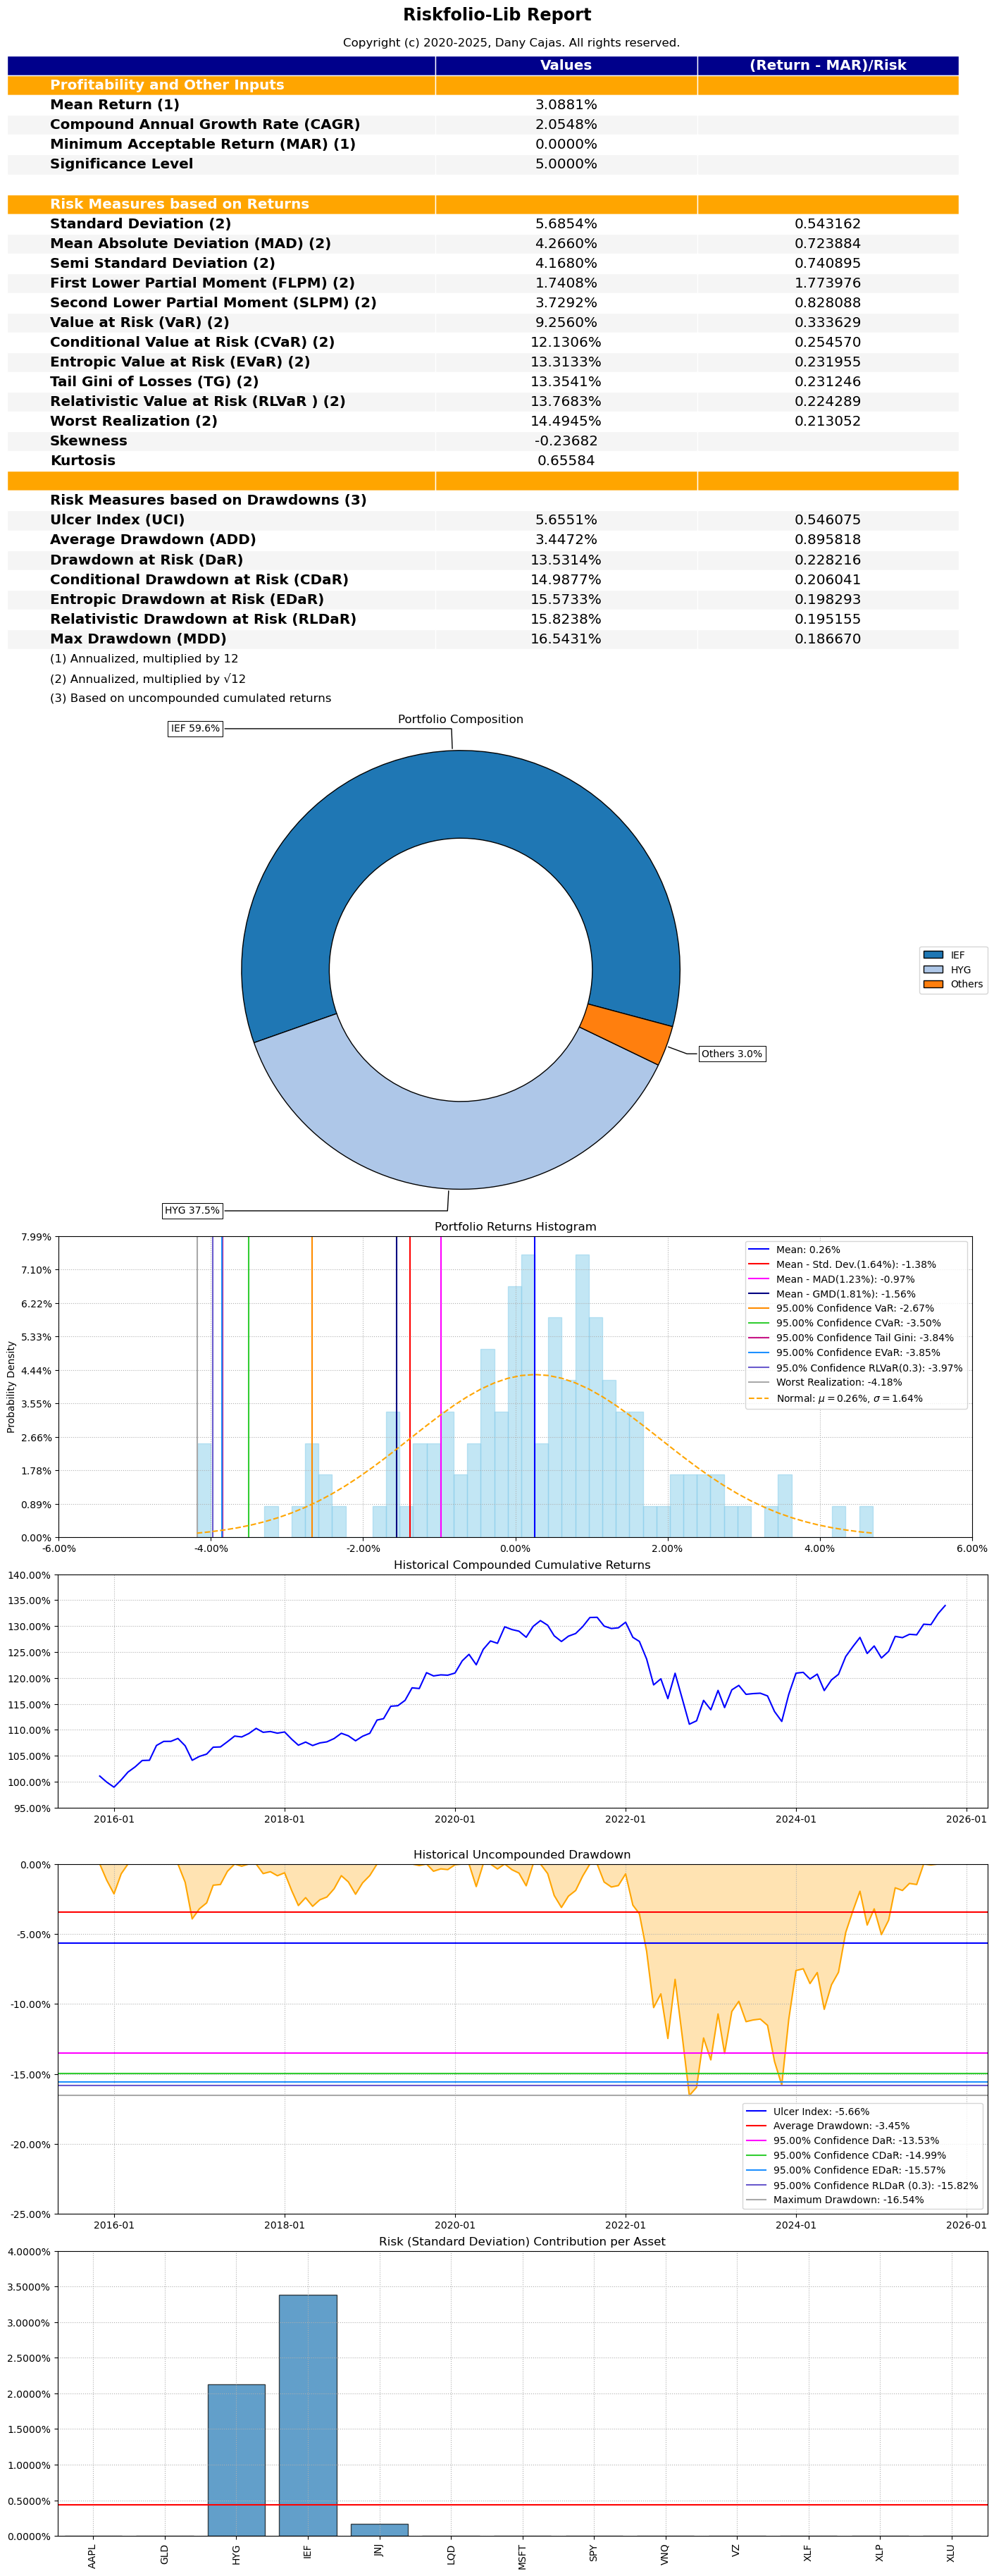

In [46]:
ax=rp.jupyter_report(Y,w_min,rm=rm,t_factor=12)
plt.show()

#### Optimizacion de Portafolio con funcion objetivo Maximizacion de Retorno

In [47]:
port.alpha=0.05
model='Classic' # Modelo calculado con datos historicos (Clasico)
rm='MV' # Utilizando la matriz de varianzas y covarianzas historicas
obj='MaxRet' # Funcion objetivo, tambien podria utilizar 'MinRisk','MaxRet' o 'Sharpe'
hist=True # Basado en datos historicos
rf=0 # Tasa libre de riesgo
l=0 # lambda es el facto de aversion al riesgo, sirve para la modelizacion de la funcion de utilidad

In [48]:
w_max=port.optimization(model=model,rm=rm,obj=obj,hist=hist,rf=rf,l=l) # Optimizar el portafolio
display(w_max)

,weights
AAPL,9.918286e-10
GLD,4.538028e-11
HYG,2.409793e-11
IEF,1.737029e-11
JNJ,3.614388e-11
LQD,1.956356e-11
MSFT,1.000000e+00
SPY,5.725109e-11
VNQ,2.497756e-11
VZ,2.525194e-11


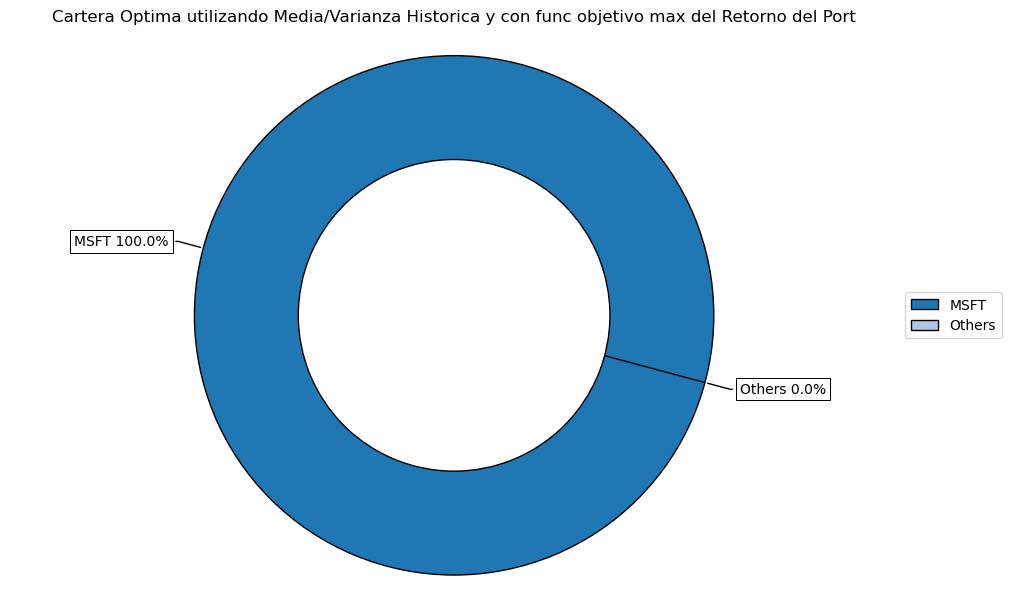

In [49]:
# Graficamos el portafolio optimo maximizando el retorno del portafolio
ax=rp.plot_pie(w=w_max,title='Cartera Optima utilizando Media/Varianza Historica y con func objetivo max del Retorno del Port',nrow=25,height=6,width=10)

In [50]:
points=50
frontier=port.efficient_frontier(model=model,rm=rm,points=points,hist=hist,rf=rf)
display(frontier.T.head(10))

,AAPL,GLD,HYG,IEF,JNJ,LQD,MSFT,SPY,VNQ,VZ,XLF,XLP,XLU
0,5.434681e-10,4.461090e-09,0.374696,0.595559,0.029745,1.465163e-09,1.542004e-09,1.130219e-09,5.032753e-10,1.783143e-09,4.674007e-09,8.114426e-09,1.561381e-09
1,1.388049e-09,7.140691e-02,0.340260,0.482251,0.042338,2.496127e-09,5.224663e-02,2.622470e-09,8.775272e-10,3.240874e-09,1.149744e-02,1.024303e-08,4.103739e-09
2,2.925876e-08,1.130644e-01,0.298834,0.437079,0.042320,2.596201e-08,8.409915e-02,2.822490e-08,9.761281e-09,3.924286e-08,2.460294e-02,1.739732e-07,6.394169e-08
3,1.692931e-08,1.468759e-01,0.265051,0.400517,0.042327,1.453045e-08,1.099778e-01,1.535456e-08,5.116764e-09,1.540688e-08,3.525149e-02,4.314026e-08,2.678138e-08
4,7.531217e-08,1.766366e-01,0.235501,0.368201,0.042334,5.276089e-08,1.327235e-01,5.732760e-08,1.893902e-08,6.528852e-08,4.460302e-02,1.759495e-07,1.134103e-07
5,3.246839e-09,2.038510e-01,0.208350,0.338745,0.042347,1.929501e-09,1.535228e-01,1.878041e-09,6.935234e-10,2.898855e-09,5.318463e-02,1.051311e-08,3.392279e-09
6,1.457231e-07,2.292911e-01,0.183106,0.311120,0.042329,5.246082e-08,1.729907e-01,5.705610e-08,1.791061e-08,6.381106e-08,6.116274e-02,1.818016e-07,1.545429e-07
7,5.105282e-07,2.534379e-01,0.159008,0.284991,0.042328,4.866809e-08,1.914570e-01,5.489993e-08,1.779952e-08,5.878802e-08,6.877727e-02,2.035699e-07,2.031728e-07
8,1.161235e-07,2.765832e-01,0.135981,0.259887,0.042330,3.647144e-08,2.091612e-01,3.797367e-08,1.275088e-08,3.918467e-08,7.605700e-02,1.041185e-07,1.340508e-07
9,1.329759e-06,2.989428e-01,0.113719,0.235655,0.042334,3.355487e-08,2.262607e-01,3.459246e-08,1.143344e-08,3.668492e-08,8.308630e-02,8.833410e-08,1.130732e-07


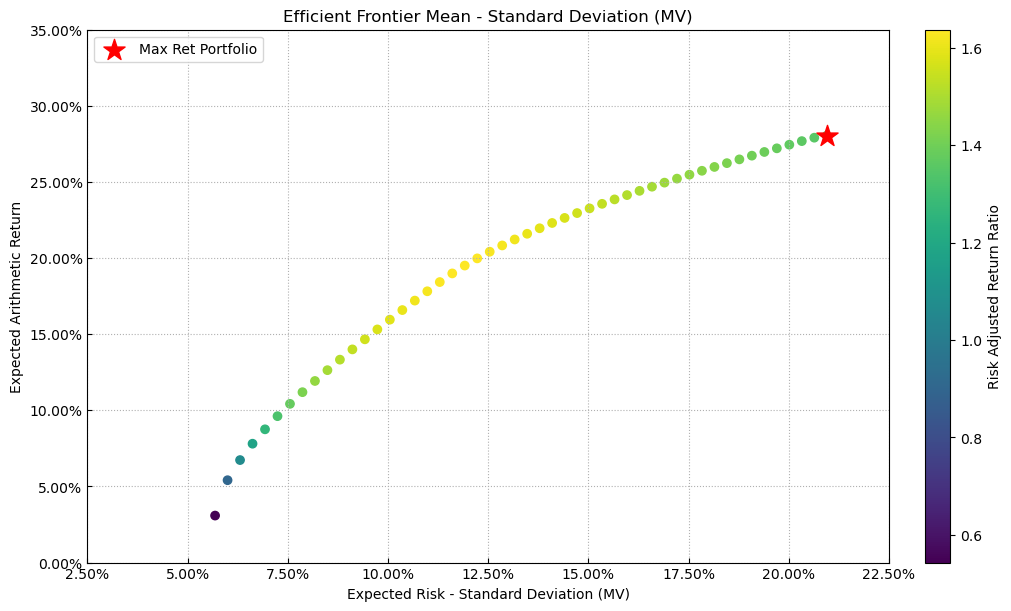

In [51]:
ax=rp.plot_frontier(w_frontier=frontier,mu=port.mu,cov=port.cov,returns=port.returns,w=w_max,label='Max Ret Portfolio',t_factor=12)

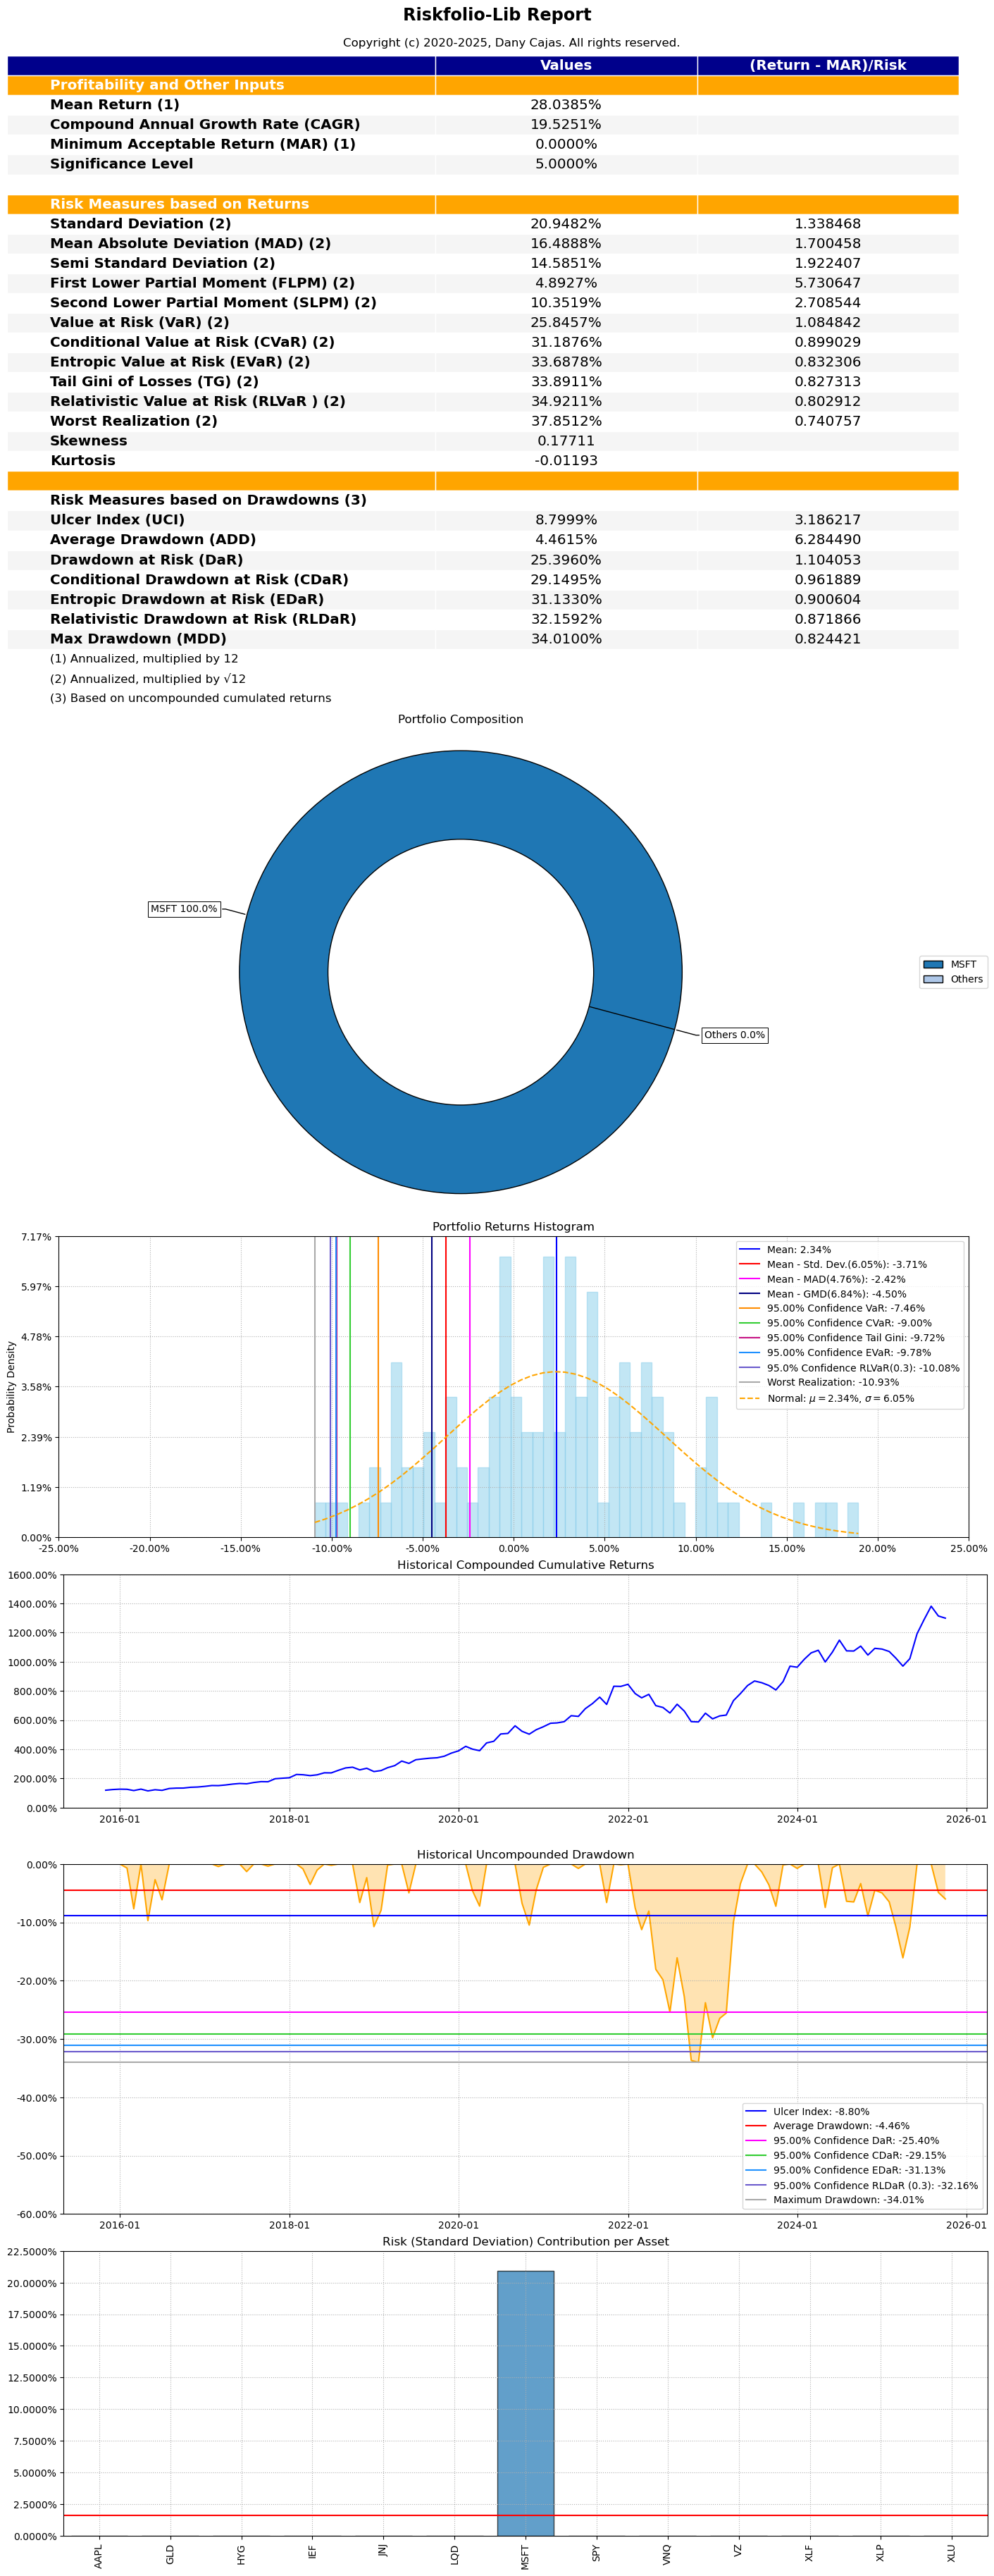

In [53]:
ax=rp.jupyter_report(Y,w_max,rm=rm,t_factor=12)
plt.show()

#### Comparando los pesos del portafolio segun funcion objetivo

In [54]:
w = w.rename(columns={"weights":"w_sharpe_ratio"})
w

,w_sharpe_ratio
AAPL,3.702229e-02
GLD,4.656549e-01
HYG,9.157443e-10
IEF,7.475479e-10
JNJ,1.779797e-03
LQD,4.158445e-10
MSFT,3.947939e-01
SPY,6.102204e-10
VNQ,2.255019e-10
VZ,5.304976e-10


In [56]:
w_portfolios = w
w_portfolios["w_min_risk"]=w_min
w_portfolios["w_max_return"]=w_max
w_portfolios 

,w_sharpe_ratio,w_min_risk,w_max_return
AAPL,3.702229e-02,5.434681e-10,9.918286e-10
GLD,4.656549e-01,4.461090e-09,4.538028e-11
HYG,9.157443e-10,3.746960e-01,2.409793e-11
IEF,7.475479e-10,5.955593e-01,1.737029e-11
JNJ,1.779797e-03,2.974475e-02,3.614388e-11
LQD,4.158445e-10,1.465163e-09,1.956356e-11
MSFT,3.947939e-01,1.542004e-09,1.000000e+00
SPY,6.102204e-10,1.130219e-09,5.725109e-11
VNQ,2.255019e-10,5.032753e-10,2.497756e-11
VZ,5.304976e-10,1.783143e-09,2.525194e-11


In [57]:
# Comparacion entre pesos de portafolios M/V segun funcion objetivo: Ratio de Sharpe, MinRisk y MaxRet
w_portfolios.style.format("{:.2%}").background_gradient(cmap='YlGn')

,w_sharpe_ratio,w_min_risk,w_max_return
AAPL,3.70%,0.00%,0.00%
GLD,46.57%,0.00%,0.00%
HYG,0.00%,37.47%,0.00%
IEF,0.00%,59.56%,0.00%
JNJ,0.18%,2.97%,0.00%
LQD,0.00%,0.00%,0.00%
MSFT,39.48%,0.00%,100.00%
SPY,0.00%,0.00%,0.00%
VNQ,0.00%,0.00%,0.00%
VZ,0.00%,0.00%,0.00%
